In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visual story telling part 1: green buildings

In [2]:
gb=pd.read_csv('greenbuildings.csv')
gb.head(20)

,CS_PropertyID,cluster,size,empl_gr,Rent,leasing_rate,stories,age,renovated,class_a,class_b,LEED,Energystar,green_rating,net,amenities,cd_total_07,hd_total07,total_dd_07,Precipitation,Gas_Costs,Electricity_Costs,cluster_rent
0,379105,1,260300,2.22,38.56,91.39,14,16,0,1,0,0,1,1,0,1,4988,58,5046,42.57,0.013700,0.029000,36.78
1,122151,1,67861,2.22,28.57,87.14,5,27,0,0,1,0,0,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
2,379839,1,164848,2.22,33.31,88.94,13,36,1,0,1,0,0,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
3,94614,1,93372,2.22,35.00,97.04,13,46,1,0,1,0,0,0,0,0,4988,58,5046,42.57,0.013731,0.029045,36.78
4,379285,1,174307,2.22,40.69,96.58,16,5,0,1,0,0,0,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
5,94765,1,231633,2.22,43.16,92.74,14,20,0,1,0,0,0,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
6,236739,6,210038,4.01,12.50,94.33,11,38,0,0,1,0,1,1,0,1,2746,1670,4416,25.55,0.010100,0.028900,17.50
7,234578,6,225895,4.01,14.77,91.02,15,24,0,1,0,0,0,0,0,1,2746,1670,4416,25.55,0.010118,0.028869,17.50
8,42087,6,912011,4.01,17.00,99.32,31,34,0,1,0,0,0,0,0,1,2746,1670,4416,25.55,0.010118,0.028869,17.50
9,233989,6,518578,4.01,17.00,93.54,21,36,1,1,0,0,0,0,0,1,2746,1670,4416,25.55,0.010118,0.028869,17.50


<div class="alert alert-block alert-success">The analysis conducted by an Excel expert within the developer's team is a focal point in the problem. We will make frequent references to this analysis throughout the solution, and for the purpose of this, let's name the expert Mr. Dibbles.

## Critiquing Mr. Dibbles' analysis

<div class="alert alert-block alert-success">
<strong>1. Removing Low-Occupancy Buildings:</strong>
Mr. Dibbles removed buildings with very low occupancy rates and while this may seem reasonable, it is  important to assess whether these low-occupancy buildings were disproportionately green-certified, as this could introduce bias in the analysis.

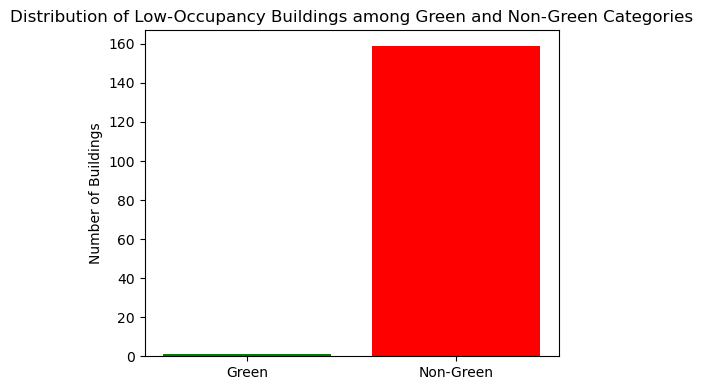

Percentage of low-occupancy buildings that are green: 0.625%
Percentage of low-occupancy buildings that are not green: 99.375%


In [3]:
low_occupancy_total = gb[gb['leasing_rate'] < 0.10].shape[0]
low_occupancy_green = gb[(gb['leasing_rate'] < 0.10) & (gb['green_rating'] == 1)].shape[0]
low_occupancy_nongreen = gb[(gb['leasing_rate'] < 0.10) & (gb['green_rating'] == 0)].shape[0]

green_percentage = (low_occupancy_green / low_occupancy_total) * 100
non_green_percentage = (low_occupancy_nongreen / low_occupancy_total) * 100

# Data for the bar plot
labels = ['Green', 'Non-Green']
values = [low_occupancy_green, low_occupancy_nongreen]

# Create the bar plot
plt.figure(figsize=(5, 4))
bars = plt.bar(labels, values, color=['green', 'red'])
plt.title('Distribution of Low-Occupancy Buildings among Green and Non-Green Categories')
plt.ylabel('Number of Buildings')
plt.tight_layout()
plt.show()

print(f"Percentage of low-occupancy buildings that are green: {green_percentage}%")
print(f"Percentage of low-occupancy buildings that are not green: {non_green_percentage}%")

<div class="alert alert-block alert-success">
When Mr. Dibbles removed these buildings, he essentially eliminated a significant portion of non-green buildings from the dataset. These buildings could have had either lower or higher rental prices. As a result, this action has the potential to artificially increase or decrease the average or median rent values of the remaining non-green buildings in the dataset. This, in turn, could lead to a skewed perspective when comparing the potentially inflated or deflated non-green building rent with the rental income of green buildings.<br>
Let's test this.

In [4]:
# 1. Calculate the Mean and Median Rents of the Original Dataset
mean_rent_original_green = gb[gb['green_rating'] == 1]['Rent'].mean()
median_rent_original_green = gb[gb['green_rating'] == 1]['Rent'].median()

mean_rent_original_nongreen = gb[gb['green_rating'] == 0]['Rent'].mean()
median_rent_original_nongreen = gb[gb['green_rating'] == 0]['Rent'].median()

# 2. Calculate the Mean and Median Rents after Removing Low-occupancy Buildings
filtered_gb = gb[gb['leasing_rate'] >= 0.10]  # Assuming 10% as the low-occupancy threshold

mean_rent_filtered_green = filtered_gb[filtered_gb['green_rating'] == 1]['Rent'].mean()
median_rent_filtered_green = filtered_gb[filtered_gb['green_rating'] == 1]['Rent'].median()

mean_rent_filtered_nongreen = filtered_gb[filtered_gb['green_rating'] == 0]['Rent'].mean()
median_rent_filtered_nongreen = filtered_gb[filtered_gb['green_rating'] == 0]['Rent'].median()

rent_comparison = {
    "Dataset": ["All", "Filtered"],
    "Green - Median Rent": [median_rent_original_green, median_rent_filtered_green],
    "Non-Green - Median Rent": [median_rent_original_nongreen, median_rent_filtered_nongreen],
    "Green - Mean Rent": [mean_rent_original_green, mean_rent_filtered_green],
    "Non-Green - Mean Rent": [mean_rent_original_nongreen, mean_rent_filtered_nongreen]
}

rent_comparison_df = pd.DataFrame(rent_comparison)
rent_comparison_df

,Dataset,Green - Median Rent,Non-Green - Median Rent,Green - Mean Rent,Non-Green - Mean Rent
0,All,27.6,25.0,30.016029,28.266778
1,Filtered,27.6,25.0,30.028480,28.414156


<div class="alert alert-block alert-success">This data suggests that removing low-occupancy buildings slightly increased the mean rents for both green and non-green buildings. However, the magnitude of the increase is small, and the median rents (which are more robust to outliers) remain unchanged.

Given this, it seems that the removal of low-occupancy buildings did not significantly inflate or deflate the rent expectations for either green or non-green buildings based on the mean and median values. 

<div class="alert alert-block alert-success"> <strong>2. Leasing Rate Threshold :</strong><br>
Before we move on, let's look at the distribution for leasing rate over the dataset. This is because Mr. Dibbles picked 10% as the threshold for low occupancy and we want to confirm if this is an appropriate choice.

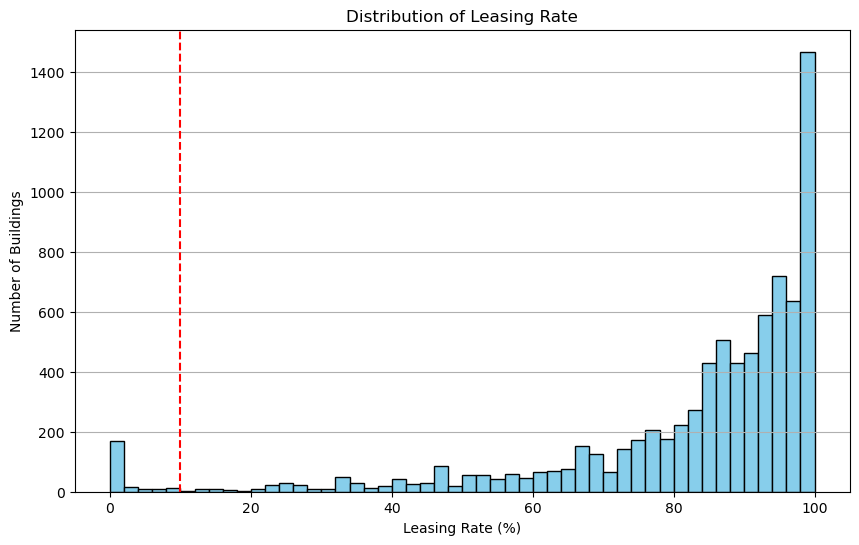

In [5]:
# Plot distribution of leasing_rate
plt.figure(figsize=(10,6))
plt.hist(gb['leasing_rate'], bins=50, color='skyblue', edgecolor='black')
plt.axvline(x=10, color='red', linestyle='--')
plt.xlabel('Leasing Rate (%)')
plt.ylabel('Number of Buildings')
plt.title('Distribution of Leasing Rate')
plt.grid(axis='y')
plt.show()

<div class="alert alert-block alert-success">The distribution of the leasing rate shows that a majority of buildings have a leasing rate above 10%. The red dashed line at 10% highlights the cutoff used by the developer's expert to remove buildings with low occupancy. This approach seems reasonable, as only a few buildings have a leasing rate below this threshold.

<div class="alert alert-block alert-success"> <strong> Confounding Variables : </strong><br>
So far, Mr.Dibbles' analysis seems accurate. However, let's consider the potential confounding variables. A confounding variable is an external factor that might affect both the predictor (in this case, green status) and the outcome (rent) and give a spurious association.

<div class="alert alert-block alert-success">From the dataset description, several potential confounders stand out:

 - <strong>Building Class:</strong> Buildings of higher quality (like Class A) may be more likely to have green certifications and also might command higher rents.
 - <strong>Size:</strong> Larger buildings may have different rent structures and might also be more likely to invest in green technologies.
 - <strong>Age & Renovation:</strong> Newer or renovated buildings might be designed with more environmentally conscious features and could command higher rents.
 - <strong>Amenities:</strong> Buildings with more amenities could have higher rents and might also be more likely to pursue green certifications.
 - <strong>Local Market Rent:</strong> The average rent in a building's local market could influence both the building's rent and its decision to go green.

<div class="alert alert-block alert-success">In the following section, we will provide evidence indicating that building class and amenities act as confounders. This is supported by the observed systematic correlation with Green Certification, along with its connection to Rent.

### Building Class

In [6]:
# Calculate mean and median rent based on class_a
mean_rent_by_class_a = filtered_gb.groupby('class_a')['Rent'].mean()
median_rent_by_class_a = filtered_gb.groupby('class_a')['Rent'].median()

# Calculate percentage of green-certified buildings based on class_a
green_counts_by_class_a = filtered_gb.groupby('class_a')['green_rating'].sum()
total_counts_by_class_a = filtered_gb.groupby('class_a').size()
green_proportion_by_class_a = (green_counts_by_class_a / total_counts_by_class_a) 

# Create a DataFrame to display the results in table form for class_a
class_a_table = pd.DataFrame({
    'Mean Rent': mean_rent_by_class_a,
    'Median Rent': median_rent_by_class_a,
    'Proportion Green-Certified (%)': green_proportion_by_class_a
})

class_a_table.reset_index()

,class_a,Mean Rent,Median Rent,Proportion Green-Certified (%)
0,0,25.955740,23.7,0.030085
1,1,32.348364,28.2,0.173499


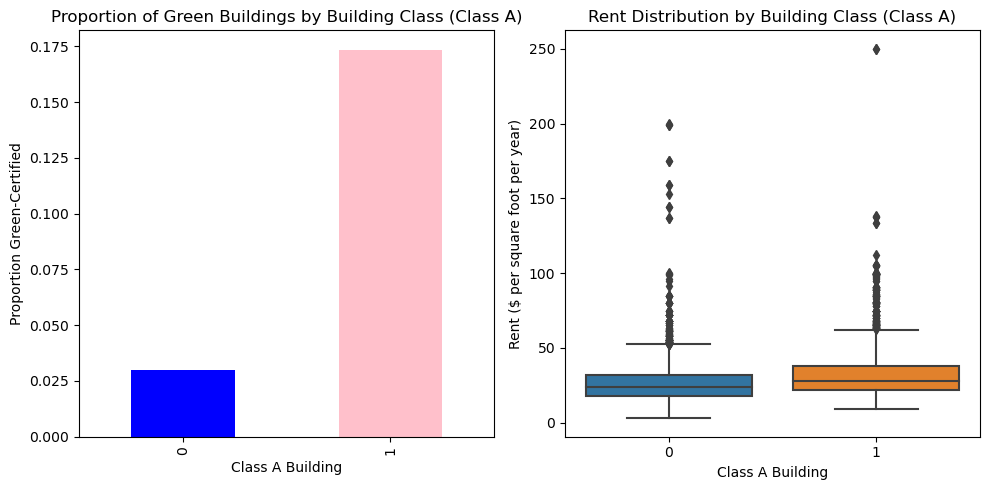

In [7]:
# Create plots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Bar plot for association between Building Class (Class A) and Green Rating with proportions
green_proportion_by_class_a.plot(kind='bar', ax=ax[0],color=['blue', 'pink'])
ax[0].set_title('Proportion of Green Buildings by Building Class (Class A)')
ax[0].set_xlabel('Class A Building')
ax[0].set_ylabel('Proportion Green-Certified')

# Box plot for Rent distribution by Building Class (Class A)
sns.boxplot(x='class_a', y='Rent', data=filtered_gb, ax=ax[1])
ax[1].set_title('Rent Distribution by Building Class (Class A)')
ax[1].set_xlabel('Class A Building')
ax[1].set_ylabel('Rent ($ per square foot per year)')

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
    
 - <strong>Association with Green Certification:</strong> The proportion of green-certified buildings is higher among Class A buildings than non-Class A buildings. This indicates that higher-quality buildings are more likely to be green-certified.
 - <strong>Effect on Rent:</strong> Class A buildings tend to command higher rents than non-Class A buildings, as expected.<br>
Thus, building class (Class A) is a confounder as it's associated with both green certification and rent.

### Amenities

In [9]:
# Calculate mean and median rent based on amenities
mean_rent_by_amenities = filtered_gb.groupby('amenities')['Rent'].mean()
median_rent_by_amenities = filtered_gb.groupby('amenities')['Rent'].median()

# Calculate percentage of green-certified buildings based on amenities
green_counts_by_amenities = filtered_gb.groupby('amenities')['green_rating'].sum()
total_counts_by_amenities = filtered_gb.groupby('amenities').size()
green_percentage_by_amenities = (green_counts_by_amenities / total_counts_by_amenities) * 100

# Create a DataFrame to display the results in table form
amenities_table = pd.DataFrame({
    'Mean Rent': mean_rent_by_amenities,
    'Median Rent': median_rent_by_amenities,
    'Percentage Green-Certified (%)': green_percentage_by_amenities
})

amenities_table.reset_index()

,amenities,Mean Rent,Median Rent,Percentage Green-Certified (%)
0,0,27.696348,25.2,5.181058
1,1,29.302459,25.4,12.017375


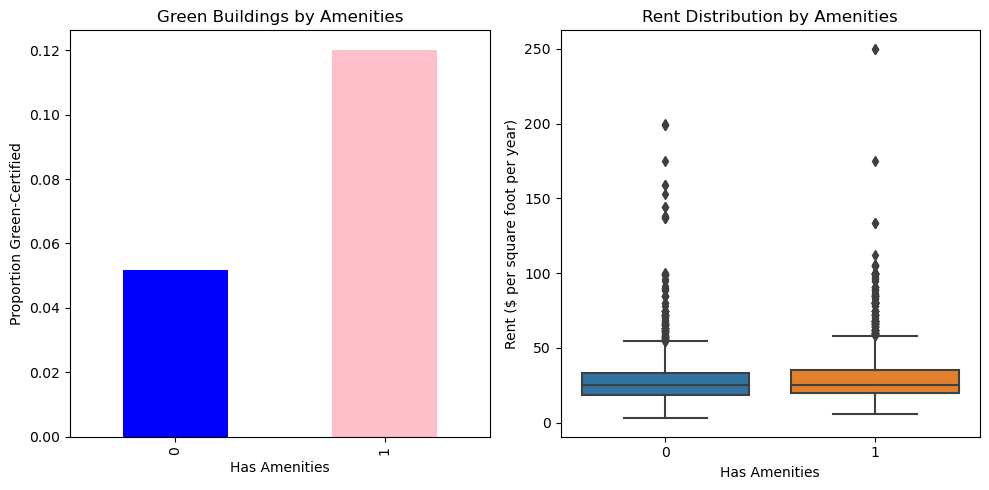

In [10]:
# Calculate proportions of Green-Certified buildings for each category of amenities
proportions = filtered_gb.groupby('amenities')['green_rating'].mean()

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Bar plot for association between Amenities and Green Rating
proportions.plot(kind='bar', ax=ax[0],color=['blue', 'pink'])
ax[0].set_title('Green Buildings by Amenities')
ax[0].set_xlabel('Has Amenities')
ax[0].set_ylabel('Proportion Green-Certified')

# Box plot for Rent distribution by Amenities
sns.boxplot(x='amenities', y='Rent', data=filtered_gb, ax=ax[1])
ax[1].set_title('Rent Distribution by Amenities')
ax[1].set_xlabel('Has Amenities')
ax[1].set_ylabel('Rent ($ per square foot per year)')

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
    
 - <strong>Association with Green Certification:</strong> Buildings with amenities have a higher proportion of green certifications compared to those without amenities. This suggests that buildings offering amenities are more likely to be green-certified.
 - <strong>Effect on Rent:</strong> Buildings with amenities tend to command higher rents than those without amenities. <strong>Note that the difference in median rents, however, is very small, so we cannot say with as much confidence as in the case of the building class A, that there is a relationship here.</strong><br>
Given these observations, the presence of amenities might be a confounder but we will need to do more analysis to confirm for sure.

<div class="alert alert-block alert-success">The remaining potential confounders, upon investigation, did not demonstrate a significant confounding effect.

<div class="alert alert-block alert-success"> <strong> Adjustment for Confounding Variables : </strong>

<div class="alert alert-block alert-success">Let us limit ourselves to building class A at the moment to understand how to adjust for confounding variables.

<div class="alert alert-block alert-success">
In our problem, we're trying to understand if green certification affects rent. Class A status is our confounder. So, we need to "adjust" for this by essentially asking: "Among buildings of the same class (e.g., all Class A or all non-Class A), does green certification still make a difference in rent?" <br>

<strong>How the visualization helps:</strong> The boxplot stratifies buildings by class (Class A and non-Class A). Within each class, it compares the rent between green and non-green buildings. By doing this, it allows us to see the effect of green certification on rent within each class, separate from the class's overall effect.

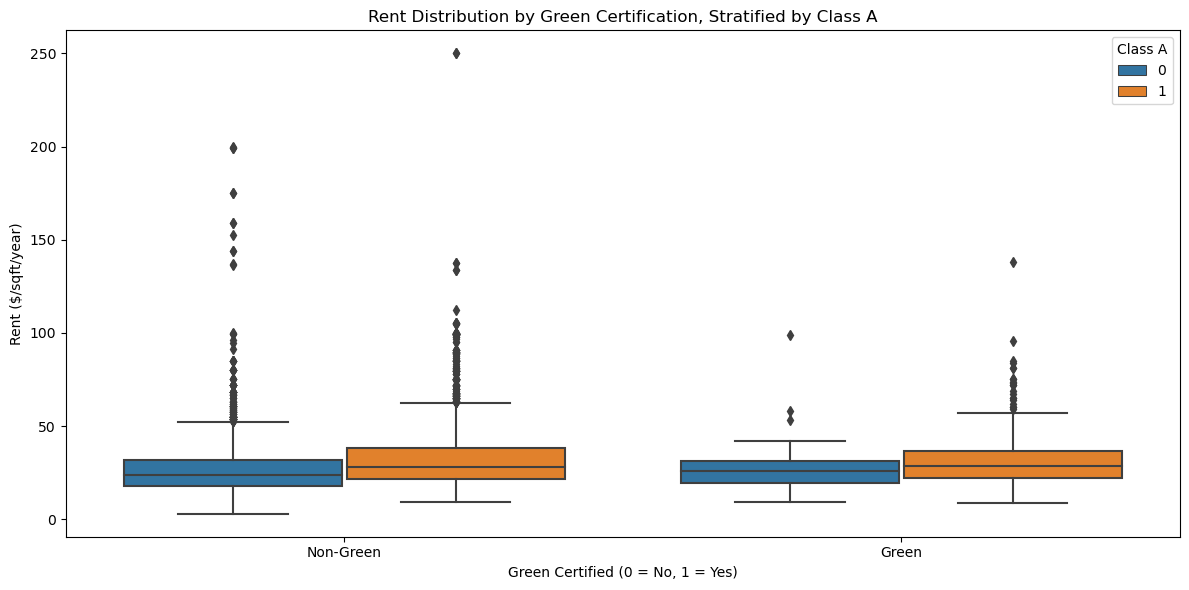

In [12]:
# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Create a boxplot
sns.boxplot(data=filtered_gb, x="green_rating", y="Rent", hue="class_a")

# Customizing the plot
plt.title("Rent Distribution by Green Certification, Stratified by Class A")
plt.xlabel("Green Certified (0 = No, 1 = Yes)")
plt.ylabel("Rent ($/sqft/year)")
plt.legend(title="Class A")
plt.xticks([0, 1], ["Non-Green", "Green"])

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
    
From the plot, a few observations can be made:<br>
    
 - Both in Class A and non-Class A categories, green-certified buildings tend to have higher median rents than their non-green counterparts
 - The difference in rent between green and non-green buildings seems more pronounced in the Class A category
 - The overall distribution of rents is higher for Class A buildings, confirming that building class is indeed a confounding factor <br>
   
By "adjusting" for the building class in this manner, we get a clearer picture of the relationship between green certification and rent, separate from the effect of the building class.

## Other Hypotheses and Insights

<div class="alert alert-block alert-success"> We've spent a fair amount of time examining and critiquing Mr. Dibbles' approach. Let us now focus on understanding the data a little bit better so we can come up with a better method to calculate expected revenue and profits.

<div class="alert alert-block alert-success"> 
<strong>1. Energy needs for Green vs Non-Green buildings:</strong> As expected, non-green buildings have higher energy needs. This can lead to savings that will translate into higher profit.

Average Energy needs for Green Buildings: 4217.8859649122805
Average Energy needs for Non-Green Buildings: 4701.907517730497


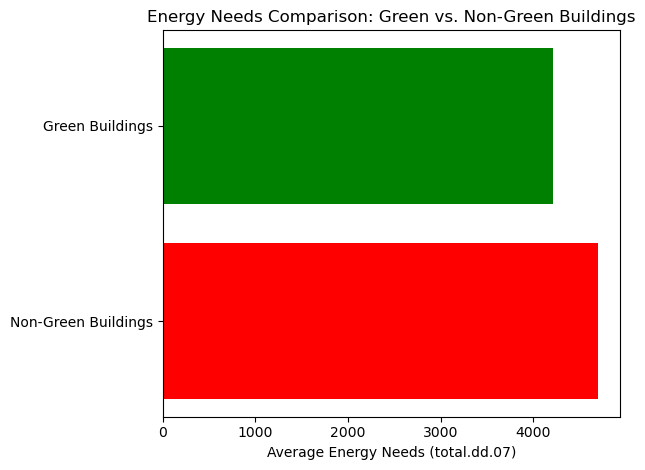

In [13]:
# Calculate average energy needs for green and non-green buildings
avg_energy_green = filtered_gb[filtered_gb['green_rating'] == 1]['total_dd_07'].mean()
avg_energy_nongreen = filtered_gb[filtered_gb['green_rating'] == 0]['total_dd_07'].mean()

print("Average Energy needs for Green Buildings:",avg_energy_green)
print("Average Energy needs for Non-Green Buildings:",avg_energy_nongreen)

# Create horizontal bar graph
labels = ['Green Buildings', 'Non-Green Buildings']
values = [avg_energy_green, avg_energy_nongreen]
colors = ['green', 'red']

plt.barh(labels, values, color=colors)
plt.xlabel('Average Energy Needs (total.dd.07)')
plt.title('Energy Needs Comparison: Green vs. Non-Green Buildings')
plt.gca().invert_yaxis()  # to display the green buildings on top
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success"> 
<strong>2. Gas and Electricity Costs for Green vs Non-Green buildings:</strong> Surprisingly, Gas costs are the same for both kinds of buildings and Electricity costs are actually marginally lower for Non-Green buildings. <br>
The higher prevalence of amenities in green buildings might explain the slightly elevated electricity costs. Amenities, depending on their nature, can lead to increased energy consumption. For example, fitness centers, advanced lighting systems, or electric vehicle charging stations might consume more electricity.

In [14]:
# Calculate average Gas costs for green and non-green buildings
avg_gas_green = filtered_gb[filtered_gb['green_rating'] == 1]['Gas_Costs'].mean()
avg_gas_nongreen = filtered_gb[filtered_gb['green_rating'] == 0]['Gas_Costs'].mean()

# Calculate average Electricity costs for green and non-green buildings
avg_electricity_green = filtered_gb[filtered_gb['green_rating'] == 1]['Electricity_Costs'].mean()
avg_electricity_nongreen = filtered_gb[filtered_gb['green_rating'] == 0]['Electricity_Costs'].mean()

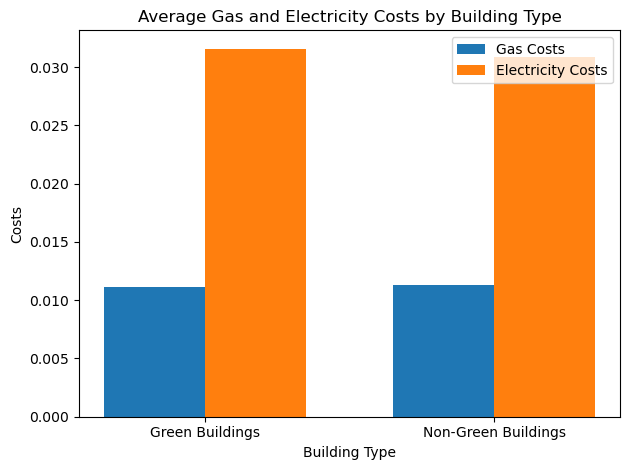

Average Gas Costs for Green Buildings: 0.011
Average Gas Costs for Non-Green Buildings: 0.011
Average Electricity Costs for Green Buildings: 0.032
Average Electricity Costs for Non-Green Buildings: 0.031


In [15]:
labels = ['Green Buildings', 'Non-Green Buildings']
gas_costs = [avg_gas_green, avg_gas_nongreen]
electricity_costs = [avg_electricity_green, avg_electricity_nongreen]

x = range(len(labels))  # the label locations

fig, ax = plt.subplots()
bar_width = 0.35  # the width of the bars

rects1 = ax.bar(x, gas_costs, bar_width, label='Gas Costs')
rects2 = ax.bar([i + bar_width for i in x], electricity_costs, bar_width, label='Electricity Costs')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Building Type')
ax.set_ylabel('Costs')
ax.set_title('Average Gas and Electricity Costs by Building Type')
ax.set_xticks([i + bar_width / 2 for i in x])
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

print("Average Gas Costs for Green Buildings:",round(avg_gas_green,3))
print("Average Gas Costs for Non-Green Buildings:",round(avg_gas_nongreen,3))

print("Average Electricity Costs for Green Buildings:",round(avg_electricity_green,3))
print("Average Electricity Costs for Non-Green Buildings:",round(avg_electricity_nongreen,3))

<div class="alert alert-block alert-success"> 
<strong>3. Precipitation and Rent:</strong> We expected to see rents going down as precipitation goes up in our data. This is because precipitation data can be used as a proxy to gauge potential for water damage costs in certain regions. However, we saw no evidence of this and the correlation coefficient between the two variables was very low (~0.07). This means precipitation levels should not be incorporated in our revenue calculation framework.

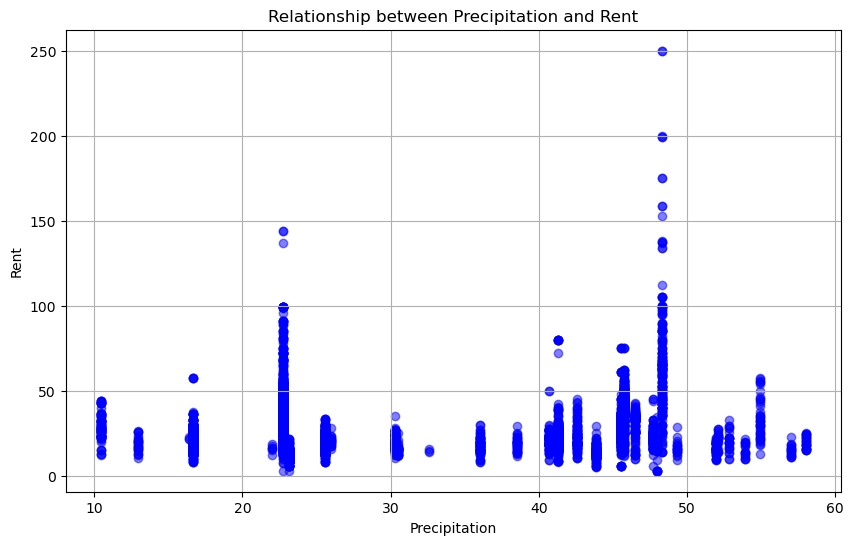

In [16]:
# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_gb['Precipitation'], filtered_gb['Rent'], color='blue', alpha=0.5)
plt.title('Relationship between Precipitation and Rent')
plt.xlabel('Precipitation')
plt.ylabel('Rent')
plt.grid(True)
plt.show()

In [17]:
correlation = filtered_gb['Precipitation'].corr(filtered_gb['Rent'])
print("Correlation between precipitation and rent:", correlation)

Correlation between precipitation and rent: 0.06854327607475379


<div class="alert alert-block alert-success"> 
<strong>4. Employee Growth Rate and Rent:</strong> Our hypothesis is that average empl_gr value can be used as a proxy for the rent growth rate, as higher employment growth in a region may indicate greater demand for office space. But we fail to see any systematic correlation between the two variables in our data and therefore will not incorporate it in our revenue calculation framework.

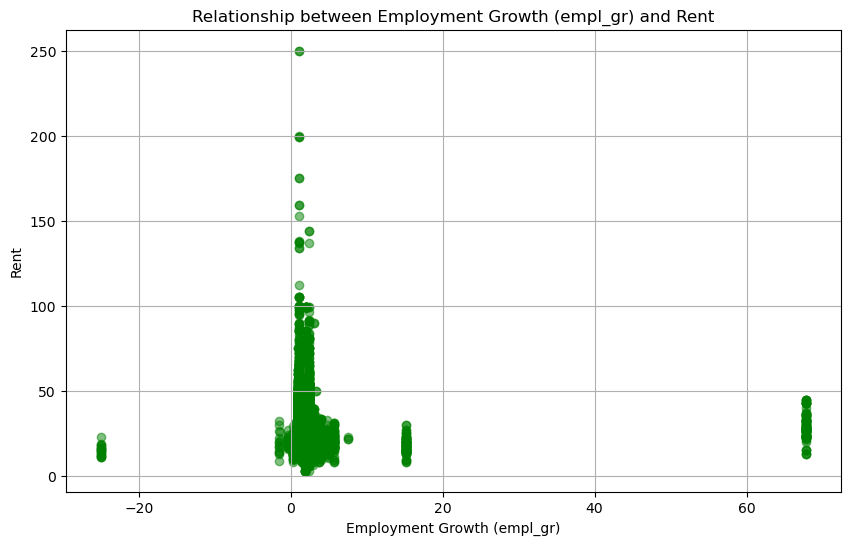

In [18]:
# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_gb['empl_gr'], filtered_gb['Rent'], color='green', alpha=0.5)
plt.title('Relationship between Employment Growth (empl_gr) and Rent')
plt.xlabel('Employment Growth (empl_gr)')
plt.ylabel('Rent')
plt.grid(True)
plt.show()

In [19]:
correlation = filtered_gb['empl_gr'].corr(filtered_gb['Rent'])
print("Correlation between employment growth (empl_gr) and rent:", correlation)

Correlation between employment growth (empl_gr) and rent: -0.024017033156553323


## New Revenue and Profit Calculation Framework:

<div class="alert alert-block alert-success"> 
   

Based on the insights we've gathered, it's clear that including the following elements in the calculation framework can not only address the issues found in Mr. Dibbles' design but also enhance the framework's overall robustness:
    
#### 1. Yearly Rent Revenue:

 -  **Median Rent Premium for green-certified buildings**:  
    This provides a baseline comparison between green and non-green buildings in terms of rent per square foot.
    
 -  **Yearly Rent Growth Rate**:  
   Mr. Dibbles did not incorporate rent growth into his analysis and this will be vital in calculating revenue and profits over time.

 - **Building Classification & Amenities**:  
    If the building has amenities or is a Class A building, there will be an additional premium and rent will likely be higher.

#### 2. Occupancy Factor:

 -  **Initial occupancy rate**:  
    This could be the current average leasing rate for green buildings.

 -  **Yearly Occupancy Growth Rate**:  
    Buildings with amenities or a Class A status typically have higher occupancy rates. The growth in occupancy could also be influenced by the overall growth rate of the region or city where the building is located.

 -  **Building Classification & Amenities**:  
    Similar to rent, having amenities or being a Class A building could lead to a higher occupancy rate.
 
#### 3. Reduced Energy Needs for Green Buildings:
Green-certified buildings typically have lower energy needs due to efficient designs and technologies. This can lead to substantial energy savings over the lifespan of the building (Basing this off of the low energy needs chart even though the gas and electricity costs data does not align with this. We need more data to confirm this.)

#### 4. External Factors:

 -  **Regulations, Incentives, or Subsidies**:  
    Be aware of potential regulations, incentives, or subsidies for green buildings which can affect costs or revenue.

#### 5. Loan and Depreciation:

 -  **Interest**:  
    If the construction costs are financed, the interest on the loan will need to be factored into the overall cost.

 -  **Depreciation**:  
    Over time, the building will depreciate in value. This needs to be considered when calculating net profit over the lifespan of the building. Green buildings usually incorporate sustainable materials and designs that may have longer lifespans than traditional materials. This can mean less wear and tear and, therefore, slower physical depreciation.